# Task 05: Movie Recommendation System

## 1. Introduction
In this task, we build a **Movie Recommendation System** using the **MovieLens dataset**.  
The goal is to recommend movies to users based on their past ratings and preferences.


### -Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split

##  1. Importing Dataset
- Loading MovieLens 100K dataset

- importing movies.csv , ratings.csv , links.csv , and tags.csv.


In [10]:
links = pd.read_csv(r'C:\Users\Administrator\AppData\Local\Programs\Python\Python313\Scripts\content\links.csv')
movies = pd.read_csv(r'C:\Users\Administrator\AppData\Local\Programs\Python\Python313\Scripts\content\movies.csv')
ratings = pd.read_csv(r'C:\Users\Administrator\AppData\Local\Programs\Python\Python313\Scripts\content\ratings.csv')
tags = pd.read_csv(r'C:\Users\Administrator\AppData\Local\Programs\Python\Python313\Scripts\content\tags.csv')


## 2. Data Exploration and Preprocessing 
- Merge datasets (ratings + movies)

- Check shape, info, null values, duplicates, summary statistics

In [13]:
df_merge=pd.merge(ratings,movies,on='movieId')

In [14]:
df_merge.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [15]:
df_merge.shape

(100836, 6)

In [16]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB


In [17]:

df_merge.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [18]:
df_merge.duplicated().sum()

np.int64(0)

In [19]:
df_merge.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


## 3. User-Item Matrix

- Create pivot table (userId × title)

- Fill missing values with 0

In [20]:
user_sim_df=df_merge.pivot_table(index='userId',columns='title',values='rating')
user_sim_df = user_sim_df.fillna(0)
user_sim_df.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 4. User-Based Collaborative Filtering

- Compute cosine similarity between users

- Define recommend_movies function

In [21]:
user_simlilarity=cosine_similarity(user_sim_df)
user_simlilarity_df=pd.DataFrame(user_simlilarity,index=user_sim_df.index, columns=user_sim_df.index)
user_simlilarity_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.027283,0.059720,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875,...,0.080554,0.164455,0.221486,0.070669,0.153625,0.164191,0.269389,0.291097,0.093572,0.145321
2,0.027283,1.000000,0.000000,0.003726,0.016614,0.025333,0.027585,0.027257,0.000000,0.067445,...,0.202671,0.016866,0.011997,0.000000,0.000000,0.028429,0.012948,0.046211,0.027565,0.102427
3,0.059720,0.000000,1.000000,0.002251,0.005020,0.003936,0.000000,0.004941,0.000000,0.000000,...,0.005048,0.004892,0.024992,0.000000,0.010694,0.012993,0.019247,0.021128,0.000000,0.032119
4,0.194395,0.003726,0.002251,1.000000,0.128659,0.088491,0.115120,0.062969,0.011361,0.031163,...,0.085938,0.128273,0.307973,0.052985,0.084584,0.200395,0.131746,0.149858,0.032198,0.107683
5,0.129080,0.016614,0.005020,0.128659,1.000000,0.300349,0.108342,0.429075,0.000000,0.030611,...,0.068048,0.418747,0.110148,0.258773,0.148758,0.106435,0.152866,0.135535,0.261232,0.060792


In [26]:
def recommend_movies(user_id, k=5):
    # Find similar users (excluding the user itself)
    similar_users = user_simlilarity_df[user_id].sort_values(ascending=False).index[1:]

    # Movies already watched by the target user
    watched_movies = set(user_sim_df.loc[user_id][user_sim_df.loc[user_id] > 0].index)

    recommendations = {}

    # Loop through similar users
    for sim_user in similar_users:
        # Get movies this similar user has rated
        sim_user_movies = user_sim_df.loc[sim_user]
        for movie, rating in sim_user_movies.items():
            if movie not in watched_movies and rating > 0:
                recommendations[movie] = recommendations.get(movie, 0) + rating

    # Sort recommendations by score
    sorted_recommendations = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)

    return [movie for movie, _ in sorted_recommendations[:k]]


## 5. Item-Based Collaborative Filtering (Bonus)

- Build item-item similarity matrix

- Define recommend_item_movies function

In [23]:

item_sim_df=user_sim_df.T
item_sim_df.head()
     

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:

item_sim_df=cosine_similarity(item_sim_df)
item_sim_df=pd.DataFrame(item_sim_df,index=user_sim_df.columns,columns=user_sim_df.columns)
item_sim_df.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.141653,0.0,...,0.0,0.342055,0.543305,0.707107,0.0,0.0,0.139431,0.327327,0.0,0.0
'Hellboy': The Seeds of Creation (2004),0.0,1.000000,0.707107,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Round Midnight (1986),0.0,0.707107,1.000000,0.000000,0.000000,0.0,0.176777,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Salem's Lot (2004),0.0,0.000000,0.000000,1.000000,0.857493,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Til There Was You (1997),0.0,0.000000,0.000000,0.857493,1.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


In [27]:
def recommend_item_movies(movie_title, k=5):
    if movie_title not in item_sim_df.columns:
        return f"Movie '{movie_title}' not found in dataset."

    # Get similarity scores for the given movie
    similar_movies = item_sim_df[movie_title].sort_values(ascending=False)

    # Exclude the movie itself
    similar_movies = similar_movies.drop(movie_title)

    return similar_movies.head(k).index.tolist()

## 6. Matrix Factorization with SVD (Bonus)

- Apply Truncated SVD

- Predict ratings

- Define recommend_svd function

In [29]:
svd=TruncatedSVD(n_components=50)
svd_matrix=svd.fit_transform(user_sim_df)
svd_matrix.shape

(610, 50)

In [30]:

item_matrix=svd.components_
predicted_ratings=np.dot(svd_matrix,item_matrix)
predicted_df=pd.DataFrame(predicted_ratings,index=user_sim_df.index,columns=user_sim_df.columns)
predicted_df.head()
     

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,-0.033741,0.021949,-0.064035,-0.058462,-0.066687,0.010956,0.476829,0.002784,-0.919617,0.340513,...,0.011218,-0.413706,0.088980,-0.012439,-0.034321,0.340669,-0.141885,-0.127165,1.772769,0.030330
2,-0.030803,-0.009190,-0.012940,-0.001872,-0.002073,-0.005359,0.005467,0.009155,0.192456,-0.008152,...,0.003522,-0.011964,-0.034398,-0.037032,0.018837,0.061772,-0.137879,-0.004911,0.046728,-0.000078
3,0.016733,0.003334,0.007509,0.002239,0.002054,-0.001073,0.090987,-0.005368,0.041586,-0.010194,...,0.001032,0.038776,0.023622,0.022275,-0.001250,0.031821,-0.000687,0.010251,0.049496,0.003494
4,-0.006049,-0.003640,-0.040511,-0.002170,0.019887,-0.032986,-0.434321,-0.000303,-0.198072,0.041215,...,-0.004903,-0.109982,-0.105413,-0.066516,-0.004439,0.088430,-0.165965,-0.018582,0.006469,-0.003572
5,0.016041,-0.000474,-0.004718,-0.007817,-0.010577,-0.004372,-0.134749,0.001906,-0.034382,-0.076536,...,0.005650,0.050438,0.015018,0.010656,-0.008642,-0.064369,0.019569,0.040359,-0.087691,0.001874


In [31]:

def recommend_svd(user_id, k=5):

  user_predictions = predicted_df.loc[user_id].sort_values(ascending=False)
  watched_movies = user_sim_df.loc[user_id][user_sim_df.loc[user_id] > 0].index
  recommended_movies = user_predictions.drop(watched_movies)
  return recommended_movies.sort_values(ascending=False).head(k)

print(recommend_svd(user_id=1, k=5))
print(recommend_svd(user_id=1, k=5))
     

title
Die Hard (1988)                   4.022560
Godfather: Part II, The (1974)    3.294892
Godfather, The (1972)             3.049233
Jaws (1975)                       2.613200
Breakfast Club, The (1985)        2.564669
Name: 1, dtype: float64
title
Die Hard (1988)                   4.022560
Godfather: Part II, The (1974)    3.294892
Godfather, The (1972)             3.049233
Jaws (1975)                       2.613200
Breakfast Club, The (1985)        2.564669
Name: 1, dtype: float64


## 7. Precision@K

- Train-test split

- Precision@K function



In [28]:
from sklearn.model_selection import train_test_split

def precision_at_k(user_id, k=5):
    # Train-test split of ratings
    train, test = train_test_split(ratings, test_size=0.2, random_state=42)

    # Rebuild user-item matrix using train data
    train_matrix = train.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)

    # Recompute similarity
    sim = cosine_similarity(train_matrix)
    sim_df = pd.DataFrame(sim, index=train_matrix.index, columns=train_matrix.index)

    # Generate recommendations for the user
    watched_movies = set(train_matrix.loc[user_id][train_matrix.loc[user_id] > 0].index)
    recommendations = []

    similar_users = sim_df[user_id].sort_values(ascending=False).index[1:]
    rec_scores = {}

    for sim_user in similar_users:
        sim_user_movies = train_matrix.loc[sim_user]
        for movie, rating in sim_user_movies.items():
            if movie not in watched_movies and rating > 0:
                rec_scores[movie] = rec_scores.get(movie, 0) + rating

    sorted_recs = sorted(rec_scores.items(), key=lambda x: x[1], reverse=True)
    recommendations = [movie for movie, _ in sorted_recs[:k]]

    # Ground truth: movies the user rated in test set
    test_movies = set(test[(test['userId'] == user_id)]['movieId'])

    # Precision@K
    hits = len(set(recommendations) & test_movies)
    precision = hits / k if k > 0 else 0

    return precision

# Example usage:
print("Precision@5 for user 1:", precision_at_k(1, k=5))


Precision@5 for user 1: 0.2


## 9. Visualization

-  Ratings distribution
- Number of ratings per movie (top popular movies)
-  Heatmap of user-item similarity

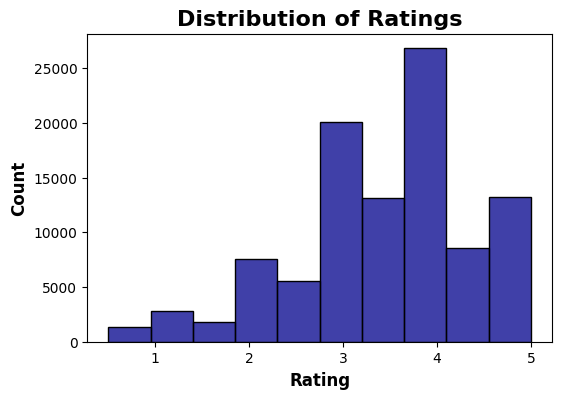

In [40]:
plt.figure(figsize=(6,4))
sns.histplot(ratings['rating'], bins=10, kde=False, color="darkblue")
plt.title("Distribution of Ratings", fontsize=16, fontweight='bold')
plt.xlabel("Rating", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')
plt.show()

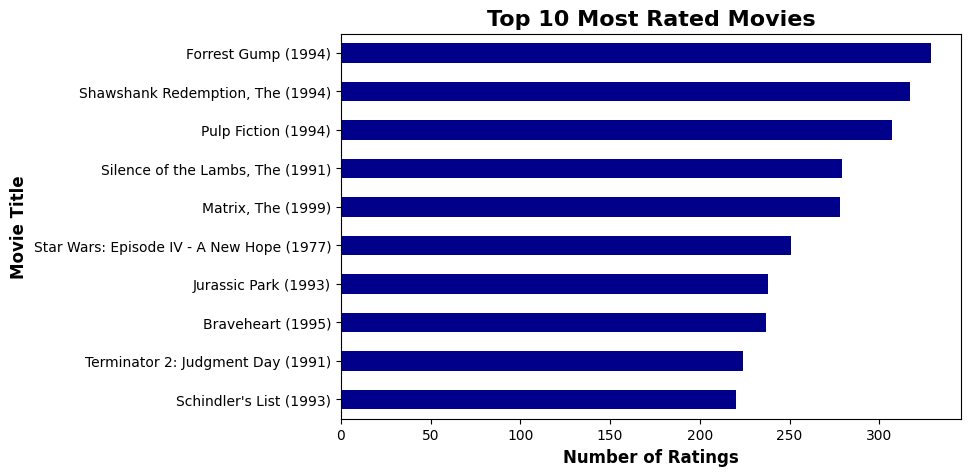

In [41]:
movie_counts = ratings['movieId'].value_counts().head(10)

top_movies = movies.loc[movies['movieId'].isin(movie_counts.index)] \
    .merge(movie_counts.rename('count'), left_on='movieId', right_index=True) \
    .sort_values('count', ascending=False)

# Plot
ax = top_movies.set_index('title')['count'].plot(
    kind='barh', figsize=(8,5), color="darkblue"
)

plt.title("Top 10 Most Rated Movies", fontsize=16, fontweight='bold')
plt.xlabel("Number of Ratings", fontsize=12, fontweight='bold')
plt.ylabel("Movie Title", fontsize=12, fontweight='bold')
plt.gca().invert_yaxis()  # highest count on top
plt.show()


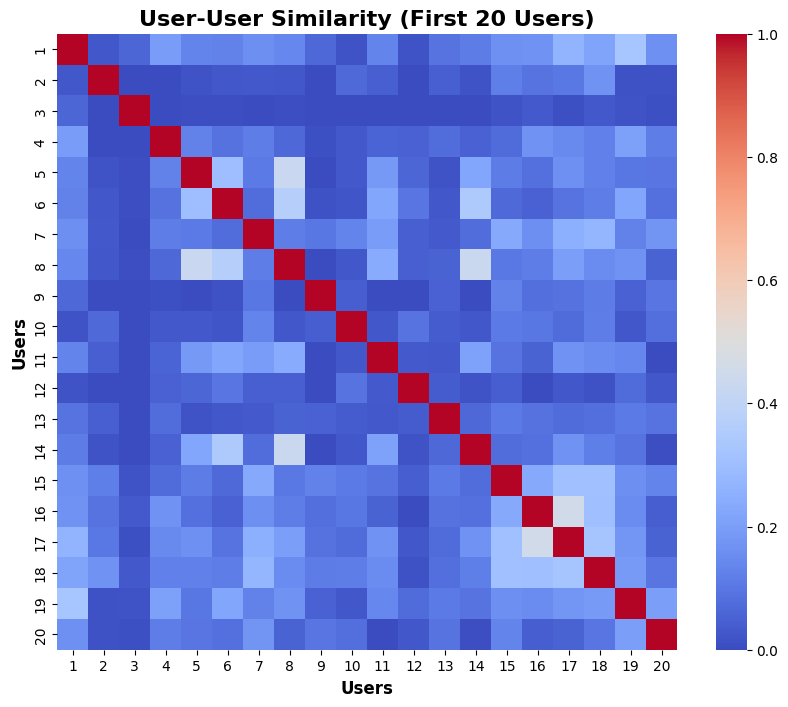

In [42]:
plt.figure(figsize=(10,8))
sns.heatmap(user_simlilarity_df.iloc[:20, :20], cmap="coolwarm", annot=False)

plt.title("User-User Similarity (First 20 Users)", fontsize=16, fontweight='bold')
plt.xlabel("Users", fontsize=12, fontweight='bold')
plt.ylabel("Users", fontsize=12, fontweight='bold')
plt.show()


## 10. Save Processed Data for Future Use & Load Saved Data


In [38]:
import joblib
import os

# Save user similarity matrix
joblib.dump(user_simlilarity_df, 'user_similarity.pkl')

# Save item similarity matrix
joblib.dump(item_sim_df, 'item_similarity.pkl')

# Save SVD predictions
joblib.dump(predicted_df, 'svd_predictions.pkl')

# Save original user-item matrix (useful for reloading later)
joblib.dump(user_sim_df, 'user_item_matrix.pkl')

print(" All files saved successfully in:", os.getcwd())

 All files saved successfully in: C:\Users\Administrator\AppData\Local\Programs\Python\Python313\Scripts


## 11.  Task Completion 
- Load and explore the MovieLens dataset (users, movies, ratings).  
- Construct a **user-item matrix** from the data.  
- Compute **similarity scores** between users (cosine similarity or correlation).  
- Recommend **top-rated unseen movies** for a given user.  
- Evaluate recommendations using **precision at K**.  
- **Bonus:**  
  - Implement **item-based collaborative filtering**.  
  - Try **matrix factorization (SVD)** for advanced recommendations.